<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/Mapa_de_calor_y_matriz_de_correlaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapa de calor y matriz de correlaciones

Tenemos un problema de clasificación de datos a través de los cuales se afirma o no que una persona tiene un problema cardiaco, según la lectura de diversos factores. Los datos con los que contamos son:

*   age: edad de la persona en años.
*   sex: 1 para hombre 0 para mujer
*   cp: dolor torácico (0,1,2,3)
*   trestbps: PA en reposo
*   chol: colestoral
*   fbs: glucemia en ayunas
*   restecg: electrocardiográfico
*   thalach: frecuencia cardiaca máxima.
*   exang: ejercicio con angina
*   oldpeak: estado del corazón durante el ejercicio.
*   slope: pendiente del corazón durante el ejercicio
*   ca: indicar el movimiento de la sangre
*   thal: esfuerzo talio (cuanto más peligro)
*   target: 1-persona tienda a tener enfermedad, 0-persona no tienda a tener ninguna enfermedad cardiaca.

Ubicacion del dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [ ]:
#carga de los datos
import gdown

# Define el enlace compartido de Google Drive
url = 'https://drive.google.com/uc?id=1nXXADtT1H7l79W4_1PTp0obO9hf5PBEG'

# Especifica la ubicación donde deseas guardar el archivo
output = '/content/heart.csv'  # Cambia 'nombre_de_tu_archivo.csv' según prefieras

# Descarga el archivo desde el enlace compartido
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nXXADtT1H7l79W4_1PTp0obO9hf5PBEG
To: /content/heart.csv
100%|██████████| 38.1k/38.1k [00:00<00:00, 18.0MB/s]


'/content/heart.csv'

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo dataset.data (reemplaza 'ruta/del/archivo' con la ruta correcta)
file_path = '/content/heart.csv'
df = pd.read_csv(file_path, sep=',')

label_encoder = LabelEncoder()

# Iterar a través de las columnas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Imprimir los primeros valores del DataFrame
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


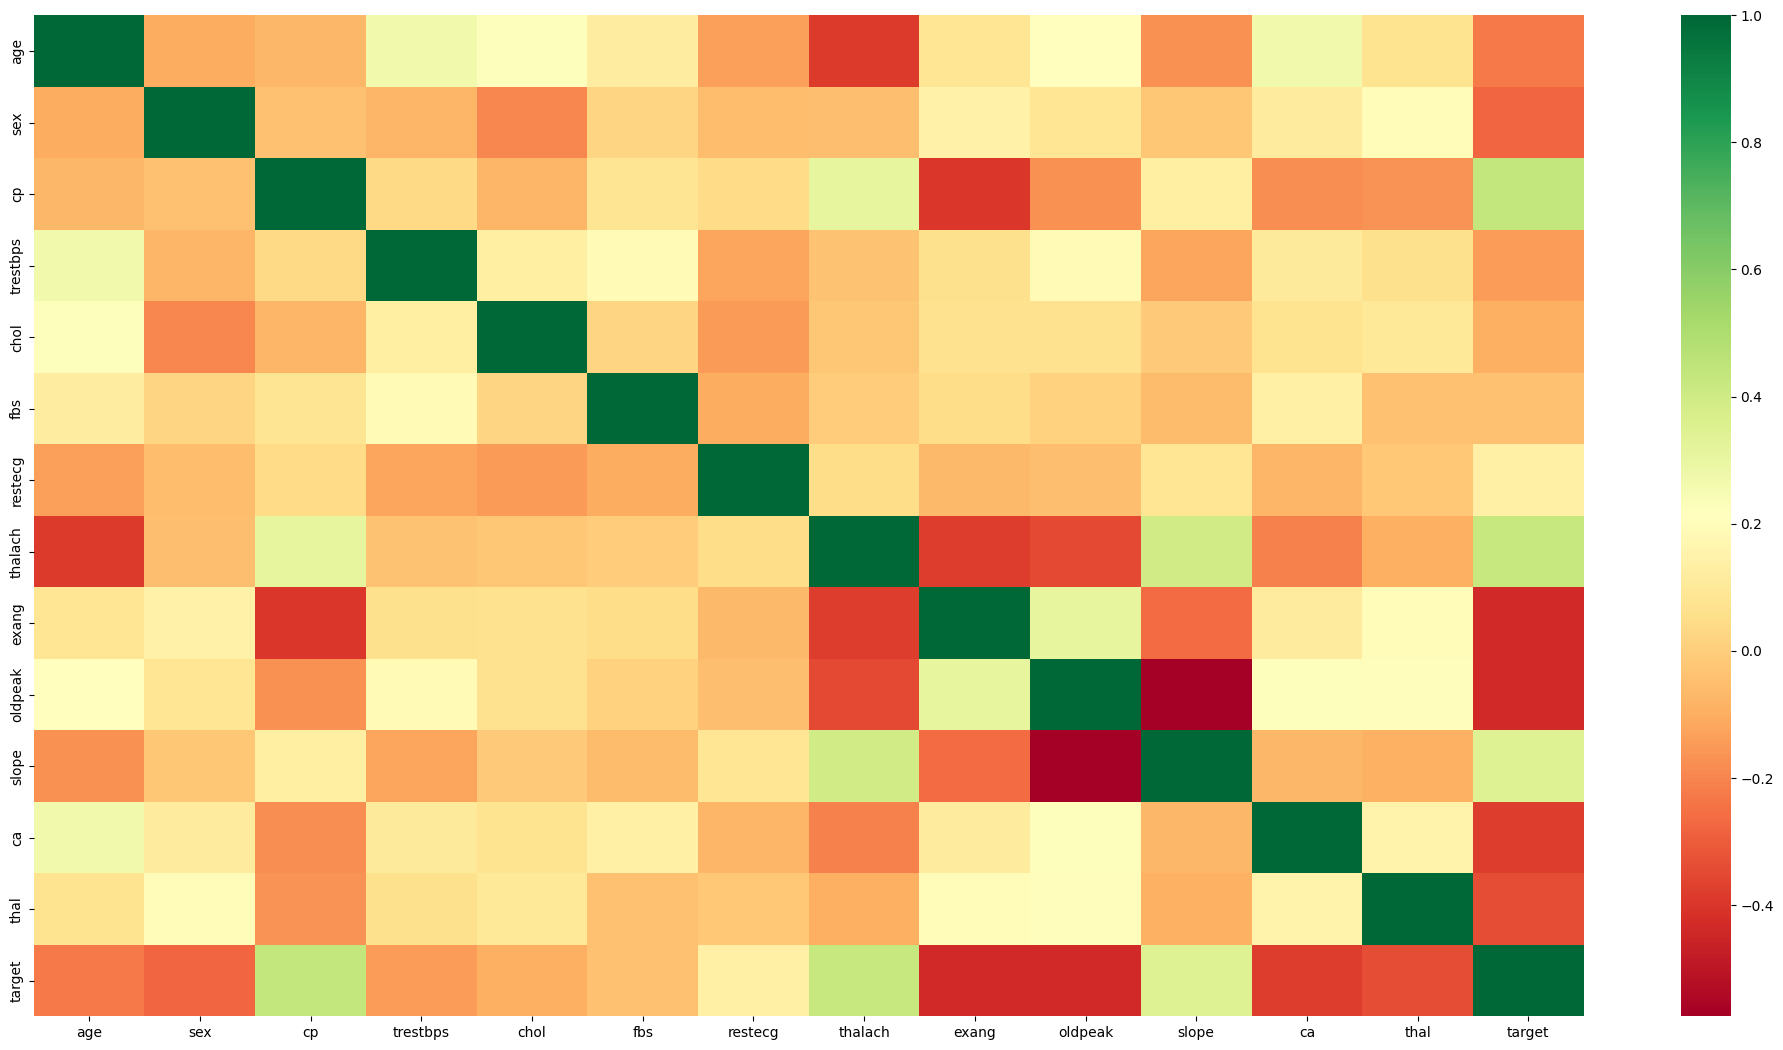

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar el tamaño del mapa de calor
plt.figure(figsize=(25, 13))

# Crear el mapa de calor de correlación
sns.heatmap(correlation_matrix, cmap="RdYlGn")

# Mostrar el mapa de calor
plt.show()

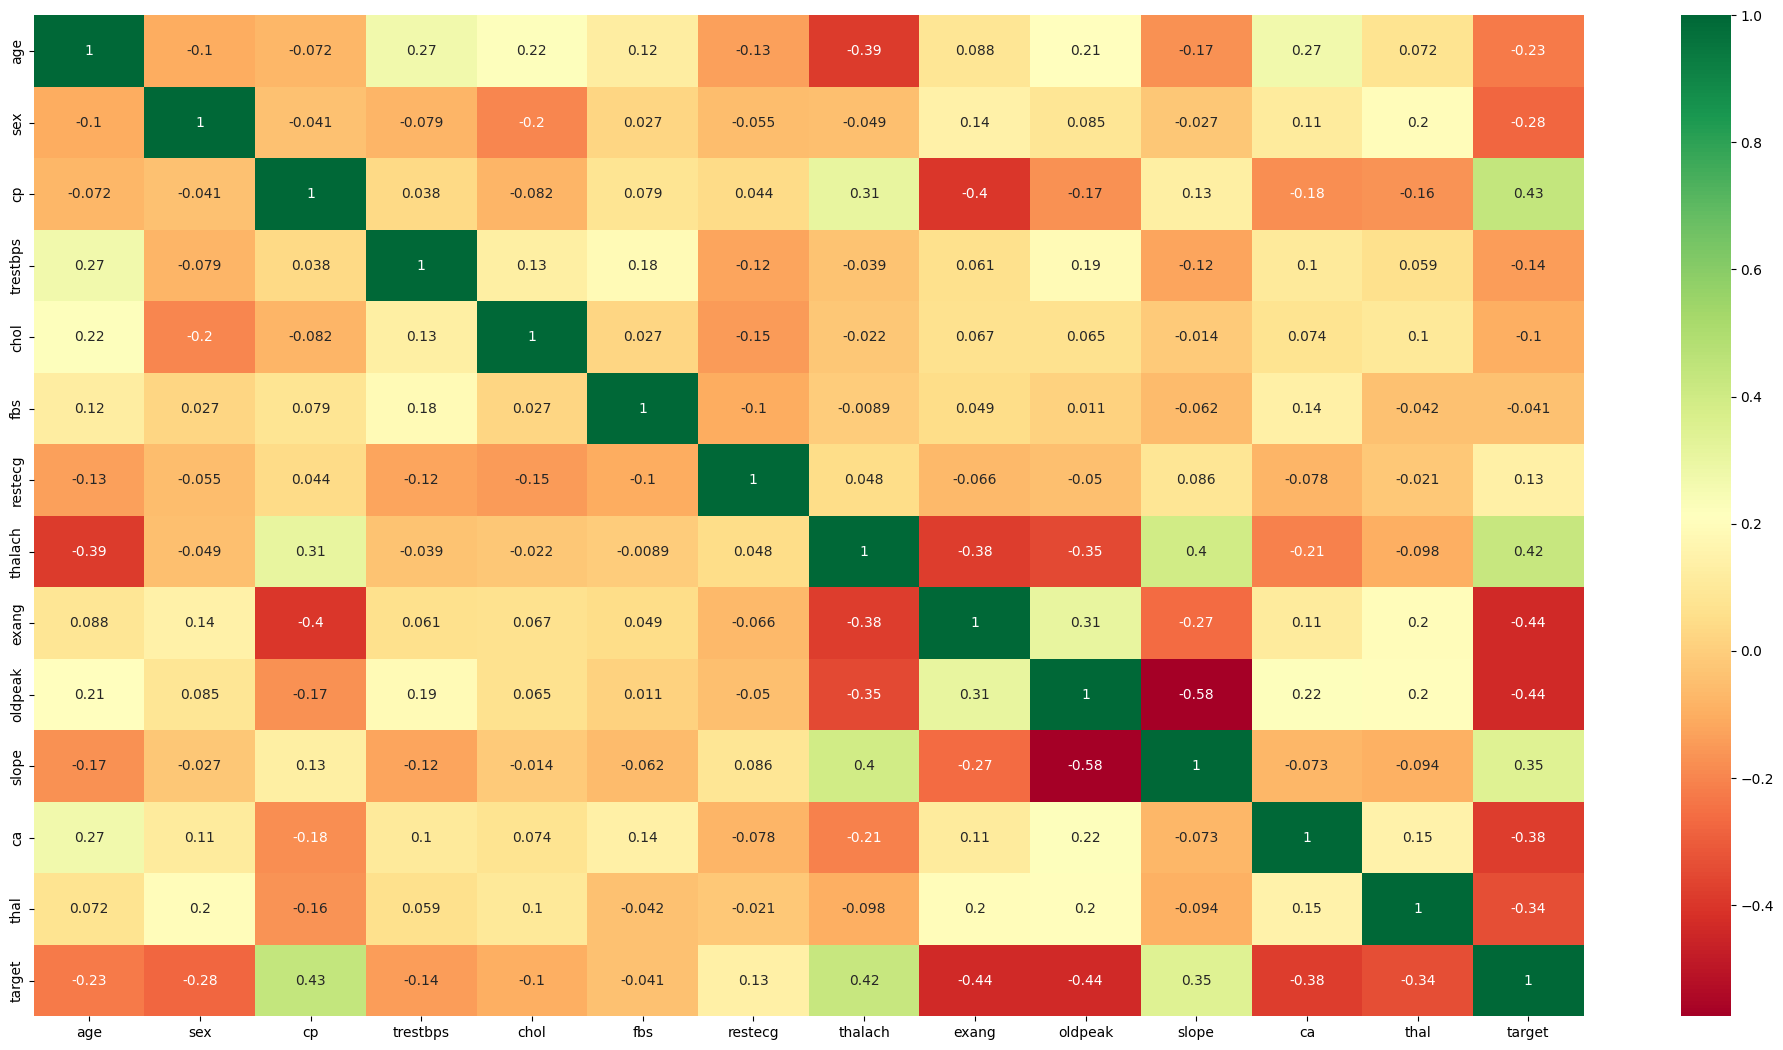

In [ ]:
plt.figure(figsize=(25, 13))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.show()

En el mapa de calor que se visualiza podemos ver lo que nos indican sus colores. Cuanto más verde, más positiva es la relación; cuanto más rojo, más negativa es la relación. Así que podemos decir que "cp" está altamente co-relacionado con "target" al igual que "thalach". Esto es lo que indica el mapa de calor.

##Analisis de impacto de la variable "thalach" en "target"

<Axes: ylabel='Frequency'>

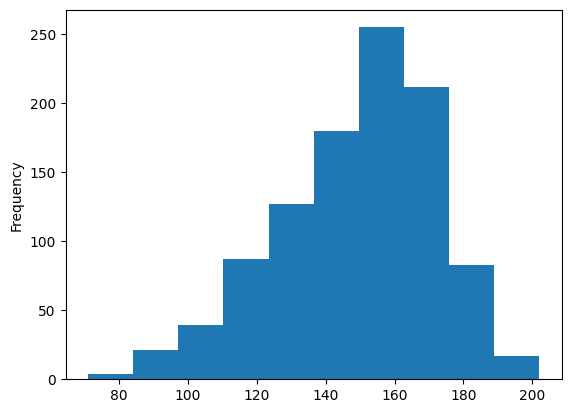

In [ ]:
df.thalach.plot.hist()

Todos los valores registrados de "thalach" se visualizan anteriormente con su frecuencia, es decir, la cantidad de registros de "thalach" en un rango determinado.

Vamos a segregar estos datos en dos secciones aquellos regitros de personas cuya presion sea menor a 180 y aquellos que sean mayor. tenemos a continuación.

In [ ]:
normal=df.loc[(df['thalach'] <= 180)]

normal.target.value_counts()

0    488
1    477
Name: target, dtype: int64

In [ ]:
alta=df.loc[(df['thalach'] > 180)]

alta.target.value_counts()

1    49
0    11
Name: target, dtype: int64

En el primer caso se tiene alrededor de 965 datos y un 49% de probabilidades de tener una cardiopatía (objetivo = 1). Por otro lado, en el segundo caso se tiene 60 datos y un 81% de posibilidades de tener una cardiopatía (objetivo = 1).

Conclusiones: Esto indica que la persona con mayor frecuencia cardíaca tiene más probabilidades de sufrir una cardiopatía. Lo mismo se indica en el mapa de calor.